In [1]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nltk.download('rslp')
from nltk.stem import RSLPStemmer

In [3]:
data = pd.read_csv('https://github.com/dnrocha1/information_retrieval/blob/master/data/results.csv?raw=true')

# Estratégia de tokenização

#### Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas) (5 pts).

- CONSIDERAR PALAVRAS INDEPENDENTE DO TAMANHO, MAS REMOVER STOPWORDS
- REMOVER PALAVRAS MENORES QUE 3 (ESTRATEGIA ATUAL)

In [4]:
texts = ''.join(data.text).lower()
regex = RegexpTokenizer(r'\b[A-zÀ-ú-\'\d]{3,}')
tokens = regex.tokenize(texts)
tokens = list(map(lambda x: x.replace("]",""), tokens))
# tokens

# Top 50 palavras

Refaça a questão 2 do Laboratório anterior usando os tokens produzidos (5 pts).

In [5]:
tokens_freq = collections.Counter(tokens)
total_word_occurrences = len(tokens)

In [6]:
r = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in tokens_freq.most_common():
    prob = (v/total_word_occurrences)*100
    words.append(k)
    frequencies.append(v)
    rankings.append(r)
    probs.append(prob)
    rprobs.append(r*prob/100)
    r += 1
    
words_statistics = pd.DataFrame()
words_statistics['Word'] = words
words_statistics['Freq'] = frequencies
words_statistics['r'] = rankings
words_statistics['Pr(%)'] = probs
words_statistics['r.Pr'] = rprobs

In [7]:
words_statistics.head(10)

,Word,Freq,r,Pr(%),r.Pr
0,que,6554,1,4.223129,0.042231
1,para,2323,2,1.496846,0.029937
2,uma,2224,3,1.433054,0.042992
3,com,2200,4,1.417590,0.056704
4,não,2049,5,1.320292,0.066015
5,por,1350,6,0.869885,0.052193
6,como,1329,7,0.856353,0.059945
7,mais,1206,8,0.777097,0.062168
8,dos,1062,9,0.684309,0.061588
9,mas,968,10,0.623739,0.062374


# Stemming nos tokens

Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. (5 pts).

- Falso positivo: duas palavras com significados diferentes reduzidas pro mesmo radical; 
  - (alarme falso) indica que uma coisa é verdade, quando na realidade não é.
  
  
- falso negativo: duas palavras que deveriam ter sido reduzidas pro mesmo mas estao em radicais diferentes
  - indica que uma condição não se aplica, não é verdade, quando ela na realidade ela acontece.

In [8]:
# hashtable key: radical, value: palavra original

rad_list = []

stemmer = RSLPStemmer()

hashtable = {}
for token in tokens:
    reduced = stemmer.stem(token)
    rad_list.append(reduced)
    if reduced in hashtable.keys():
        if token not in hashtable[reduced]:
            hashtable[reduced].append(token)
    else:
        hashtable[reduced] = [token]

In [9]:
# verifica falsos positivos

BOLD = '\033[1m'
END = '\033[0m'

for x in sorted(hashtable, key=lambda k: len(hashtable[k]), reverse=True)[:16]:
    if len(hashtable[x]) > 1:
        print(f'{BOLD}{x}{END}: {hashtable[x]}\n')

est: ['estado', 'estava', 'este', 'esta', 'está', 'estes', 'estamos', 'estão', 'estavam', 'estados', 'estou', 'estante', 'estar', 'estada', 'estávamos', 'estáveis', 'estas', 'estima', 'estável', 'estará', 'estaria', 'estarei', 'ester', 'estaremos', 'estarmos', 'estando', 'estariam', 'esteira', 'estaríamos', 'estarem', 'estarão']

pass: ['passado', 'passou', 'passaram', 'passa', 'passava', 'passam', 'passo', 'passos', 'passar', 'passará', 'passada', 'passando', 'passassem', 'passe', 'passem', 'passagem', 'passes', 'passarei', 'passaria', 'passavam', 'passei', 'passear', 'passamos', 'passagens', 'passadas', 'passados', 'passarão', 'passarem', 'passível', 'passíveis']

sent: ['sentiu', 'sentia', 'sentem', 'sente', 'sentido', 'sentava', 'sentado', 'senti', 'sentei', 'sentar', 'sentimento', 'sentidos', 'sentimentos', 'sentirei', 'sentir', 'sentados', 'sentiam', 'sentiria', 'sentirão', 'sentada', 'sentirem', 'sentam', 'sentisse', 'sentíamos', 'sentimos', 'sentiram', 'sentindo']

cont: ['cont

Falso positivo: duas palavras com significados diferentes reduzidas pro mesmo radical;

Falsos positivos encontrados:
- `est`: ['estado', 'estava', 'este', 'esta', 'está', 'estes', 'estamos', 'estão', 'estavam', 'estados', 'estou', 'estante', 'estar', 'estada', 'estávamos', 'estáveis', 'estas', 'estima', 'estável', 'estará', 'estaria', 'estarei', 'ester', 'estaremos', 'estarmos', 'estando', 'estariam', 'esteira', 'estaríamos', 'estarem', 'estarão']

- trabalh
- volt
- continu
- cri
- dev
- entr

- tom TOMÁS
- fal FALENCIA, FALIDO


In [10]:
# verifica falsos negativos

for x in sorted(hashtable)[-1000:]:
    if len(hashtable[x]) > 1:
        print(f'{BOLD}{x}{END}: {hashtable[x]}\n')

tempor: ['temporada', 'temporadas', 'temporários', 'temporariamente', 'temporário']

temá: ['temática', 'temáticas']

tend: ['tende', 'tendo', 'tendência', 'tendências', 'tendem', 'tenda']

tenh: ['tenho', 'tenham', 'tenha', 'tenhamos']

tens: ['tensão', 'tensões', 'tensas', 'tensa', 'tenso', 'tensos']

tent: ['tentou', 'tentar', 'tentava', 'tentei', 'tentado', 'tentando', 'tentativa', 'tentação', 'tentativas', 'tentações', 'tenta', 'tentarei', 'tentavam', 'tentaria', 'tentamos', 'tentam', 'tento', 'tentará', 'tente', 'tentaram']

teor: ['teorias', 'teoria']

ter: ['ter', 'teria', 'teriam', 'terem', 'terão', 'terá', 'teremos', 'teríamos', 'tereza']

terap: ['terapia', 'terapêutico']

terc: ['terceiro', 'terceira', 'terceiros']

terceir: ['terceirização', 'terceirizada', 'terceirizado']

term: ['termos', 'termo', 'terminais']

termin: ['terminar', 'terminou', 'terminada', 'terminado', 'termina', 'termine', 'terminasse', 'terminará', 'terminei', 'terminam', 'terminaria', 'terminaram']

t

falso negativo: duas palavras que deveriam ter sido reduzidas pro mesmo mas estao em radicais diferentes

- **óbv**: ['óbvia', 'óbvias'] e **óbvi**: ['óbvio', 'óbvios']
- **vulner**: ['vulnerabilidade', 'vulnerabilidades'] e **vulnerável**: ['vulneráveis', 'vulnerável']
- **viv**: ['vivido', 'vivo', 'vive', 'viver', 'vivem', 'vivos', 'viveu', 'vivemos', 'vivia', 'viva', 'vivas', 'vividos', 'vivendo', 'vividas', 'vivida', 'viverão', 'viverá', 'vivências', 'viveram', 'vivi', 'viverem'] e **vivenci**: ['vivenciando', 'vivenciaram']
- **vig**: ['vigor', 'vigia', 'vigiam', 'vigência', 'vigora', 'viga'] e **vigi**: ['vigiado', 'vigiar', 'vigiando']
- **verd**: ['verdadeiros', 'verdadeira', 'verdadeiro', 'verde', 'verdes'] e **verdad**: ['verdades', 'verdade']
  - **vel**: ['velado', 'velas', 'velada', 'velinhas'] e **velh**: ['velho', 'velha', 'velhas', 'velhos', 'velhice', 'velhinha']
- **valor**: ['valorização', 'valorizados', 'valorizar'] e **valoriz**: ['valorizou', 'valorizam']
- **utiliz**: ['utilizar', 'utilizados', 'utilizou', 'utilização', 'utilizam', 'utilizando', 'utiliza', 'utilizadas', 'utilizado', 'utilizada', 'utilizava', 'utilizem', 'utilizamos'] e **utilizá-l**: ['utilizá-la', 'utilizá-los']
- **universit**: ['universitários', 'universitário'] e **universitár**: ['universitária', 'universitárias']
- **tribut**: ['tributos', 'tributação'] e **tributár**: ['tributária', 'tributárias']
- **traum**: ['trauma', 'traumas', 'traumatizada'] e **traumá**: ['traumáticas', 'traumática', 'traumático', 'traumáticos']


# Questão 4

Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? (10 pts.)

- Os gráficos de ranking-frequência serão gerados

In [11]:
#construcao das estatisticas dos radicais
rad_freq = collections.Counter(rad_list)
total_rad_occurrences = len(rad_list)

r = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in rad_freq.most_common():
    prob = (v/total_rad_occurrences)*100
    words.append(k)
    frequencies.append(v)
    rankings.append(r)
    probs.append(prob)
    rprobs.append(r*prob/100)
    r += 1
    
rad_statistics = pd.DataFrame()
rad_statistics['Word'] = words
rad_statistics['Freq'] = frequencies
rad_statistics['r'] = rankings
rad_statistics['Pr(%)'] = probs
rad_statistics['r.Pr'] = rprobs

In [12]:
rad_statistics.head(10)

,Word,Freq,r,Pr(%),r.Pr
0,que,6559,1,4.226350,0.042264
1,com,3575,2,2.303583,0.046072
2,par,2375,3,1.530353,0.045911
3,uma,2225,4,1.433699,0.057348
4,não,2049,5,1.320292,0.066015
5,est,1405,6,0.905324,0.054319
6,por,1357,7,0.874395,0.061208
7,mais,1206,8,0.777097,0.062168
8,pel,1180,9,0.760344,0.068431
9,do,1069,10,0.688820,0.068882


In [13]:
# encontra o melhor parametro c para as palavras

probs = rad_statistics['Pr(%)'] / 100
best_c = np.median(rad_statistics['r.Pr'])
rad_statistics['bestc'] = best_c / probs
best_c

0.0741012803412525

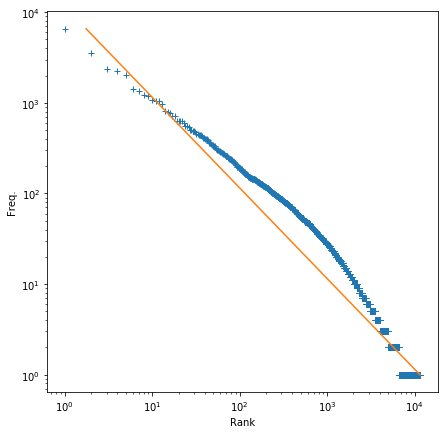

In [14]:
# plota a curva de rank-frequência para as palavras
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")

plt.plot(rad_statistics['r'], rad_statistics['Freq'], linestyle='None', marker='+')
plt.plot(rad_statistics['bestc'], rad_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()

In [19]:
# produz bigramas e suas estatisticas
bigrams = nltk.bigrams(rad_list)
f_bigrams = nltk.FreqDist(bigrams)
total_bigrams_occurrences = sum(f_bigrams.values())

In [26]:
# construcao da tabela com as estastisticas dos bigramas
bigrams_statistics = pd.DataFrame()
bigrams_statistics['Bigram'] = list(f_bigrams.keys())
bigrams_statistics['Freq'] = list(f_bigrams.values())
bigrams_statistics['r'] = bigrams_statistics.Freq.rank(ascending=False, method='first')
bigrams_statistics['Pr(%)'] = (bigrams_statistics['Freq']/total_bigrams_occurrences) * 100
bigrams_statistics['r.Pr'] = bigrams_statistics['r'] * (bigrams_statistics['Pr(%)'] / 100)

bigrams_statistics.r = bigrams_statistics.r.astype(int)

bigrams_statistics.headsort_values(by=['r'], ascending=True)

,Bigram,Freq,r,Pr(%),r.Pr
304,"(que, não)",287,1,0.184932,0.001849
998,"(que, est)",186,2,0.119852,0.002397
1406,"(com, uma)",147,3,0.094721,0.002842
137,"(diz, que)",129,4,0.083123,0.003325
2228,"(que, ele)",108,5,0.069591,0.003480
2191,"(par, que)",106,6,0.068302,0.004098
1066,"(uma, da)",103,7,0.066369,0.004646
2459,"(pod, ser)",101,8,0.065081,0.005206
264,"(afirm, que)",90,9,0.057993,0.005219
822,"(não, pod)",86,10,0.055415,0.005542


In [ ]:
# encontra o melhor parametro c para os bigramas
probs = bigrams_statistics['Pr(%)'] / 100
best_c = np.median(bigrams_statistics['r.Pr'])
bigrams_statistics['bestc'] = best_c / probs
best_c

In [ ]:
# plota a curva de rank-frequência para os bigramas
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")

plt.plot(bigrams_statistics['r'], bigrams_statistics['Freq'], linestyle='None', marker='+')
plt.plot(bigrams_statistics['bestc'], bigrams_statistics['Freq'], linestyle='-', marker='None')
plt.xlabel('Rank')
plt.ylabel('Freq.')
plt.show()